# Titanic - Machine Learning from Disaster

<img src="img/titanic1.webp">

# Projeto Titanic - Parte 1
Este projeto foi separado em 2 partes, espero mostrar como um cientista de dados agiria para resolver um problema. O objetivo é prever corretamente se alguém sobreviveu ao naufrágio do Titanic.

- Parte 2: [Clique aqui](titanic_2.ipynb)

Nessa primeira parte iremos fazer toda a EDA e data cleaning juntos, visulizando e tratando os dados. Depois criamos features e fazemos todo o pré-processamento, por fim salvando todo o progresso para iniciar o treinamento de modelos na parte 2

**Melhores resultados: 78.468% de precisão**

## Overview 
- ### Exploratory Data Analysis (EDA)
    - [Data Exploration](https://github.com/RodrigoNavarroNogueira/Titanic/blob/master/titanic_1.ipynb#Data-Exploration)
    - [Data Visualization](#Data-Visualization)
    - [Inconsistent Values](#Inconsistent-Values)
    - [Missing Data](#Missing-Data)
    - [Pclass](#Pclass)
    - [Sex](#Sex)
    - [Sibsp/Parch](#SibSp/Parch)
    - [Fare](#Fare)
    - [Embarked](#Embarked)
    - [Cabin](#Cabin)
    - [Age](#Age)
    - [Data Cleaning](#Data-Cleaning)
- ### Feature Engineering
    - [Title](#Title)
    - [Relatives](#Relatives)
    - [Alone](#Alone)
- ### Data Preprocessing for Model
    - [Pre Processing](#Pre-Processing)
    - [Feature Transformation](#Feature-Transformation)
    - [Attribute Scaling](#Attribute-Scaling)
    - [Final Considerations](#Final-Considerations)


In [1]:
# Importando todas as bibliotecas que serão necessárias
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [2]:
# Carregando as bases de dados
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# EDA
#### Análise Exploratória de Dados

- Vamos obter uma compreensão geral do conjunto de dados, incluindo o número de amostras, características disponíveis, tipos de dados, distribuição das características e resumo estatístico.
    - Visualização dos dados
    - Valores inconsistentes
    - Valores faltantes

## Data Exploration

In [3]:
# Survival 0 = No, 1 = Yes
# Verificando quais são as classes e a quantidade
np.unique(train['Survived'], return_counts=True)

(array([0, 1], dtype=int64), array([549, 342], dtype=int64))

In [4]:
# Juntando os DataFrames train e test, para fazer todo o pre-processamento uma unica vez
df_full = pd.concat([train, test]).reset_index(drop=True)

In [5]:
# Visualizando os 5 primeiros registros do DataFrame criado
df_full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Visualizando os 5 ultimos registros
df_full.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
# Visualizando quais features são categoricas e numéricas
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [8]:
# Resumo estatistico das features numéricas
df_full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
# Formato do Dataframe, 1309 registros e 12 features
df_full.shape

(1309, 12)

# Data Visualization

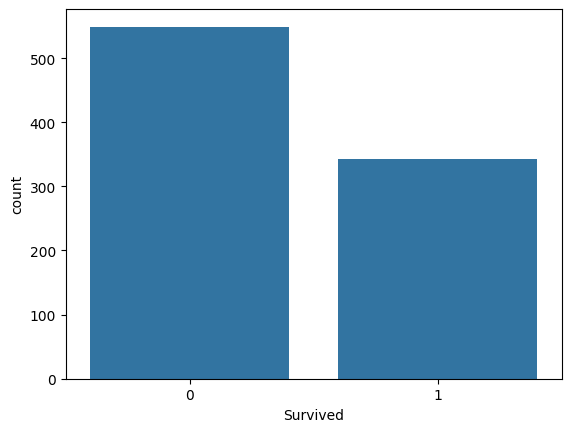

In [10]:
# Criando um gráfico de barras
sns.countplot(x = train['Survived']);

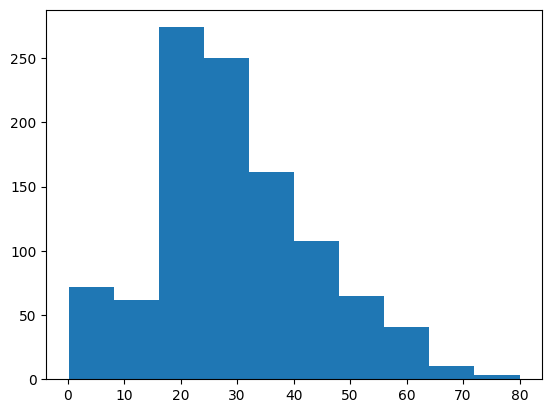

In [11]:
# Histograma da idade dos passageiros
plt.hist(x = df_full['Age']);

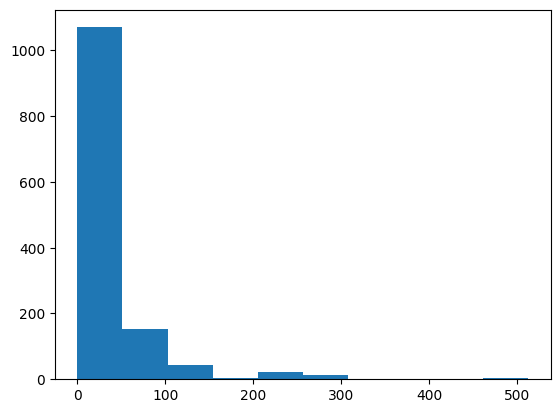

In [12]:
# Histograma dos valores pagos pelos passageiros
plt.hist(x = df_full['Fare']);

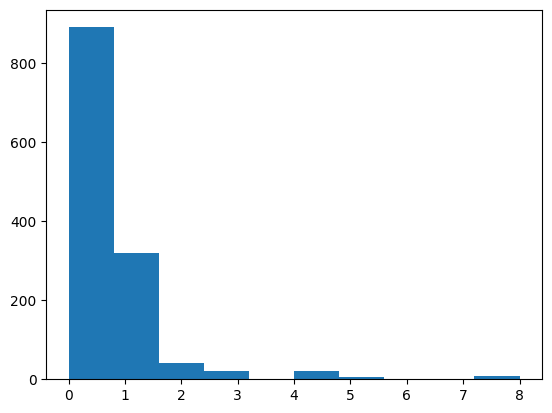

In [13]:
# Histograma de pais/filhos
plt.hist(x = df_full['SibSp']);

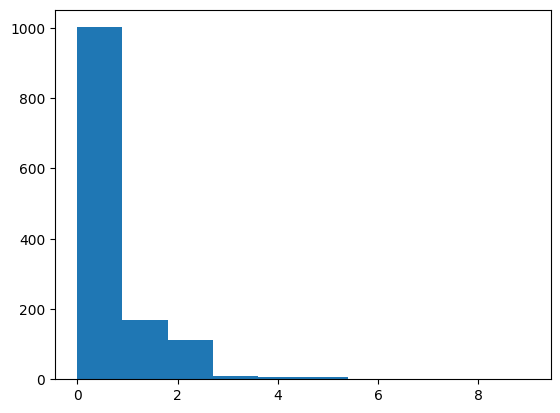

In [14]:
# Histograma de irmãos/cônjuges
plt.hist(x = df_full['Parch']);

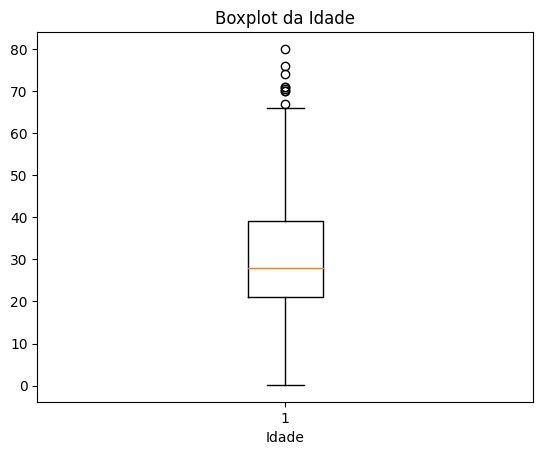

In [15]:
# Boxplot da feature Age com matplotlib
plt.boxplot(df_full['Age'].dropna())
plt.xlabel('Idade')
plt.title('Boxplot da Idade')
plt.show()

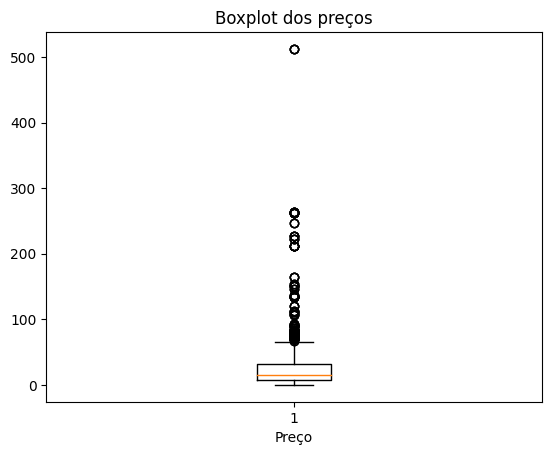

In [16]:
# Boxplot da feature Fare com matplotlib
plt.boxplot(df_full['Fare'].dropna())
plt.xlabel('Preço')
plt.title('Boxplot dos preços')
plt.show()

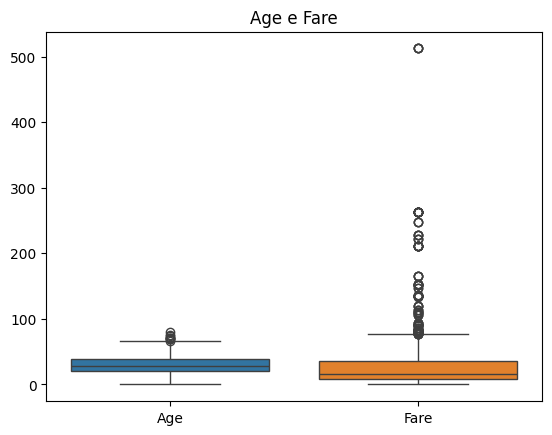

In [17]:
# Boxplot para as features 'Age' e 'Fare' com seaborn
# Selecionando apenas as colunas 'Age' e 'Fare'
age_fare = df_full[['Age', 'Fare']].dropna()

sns.boxplot(data=age_fare)
plt.title('Age e Fare')
plt.show()

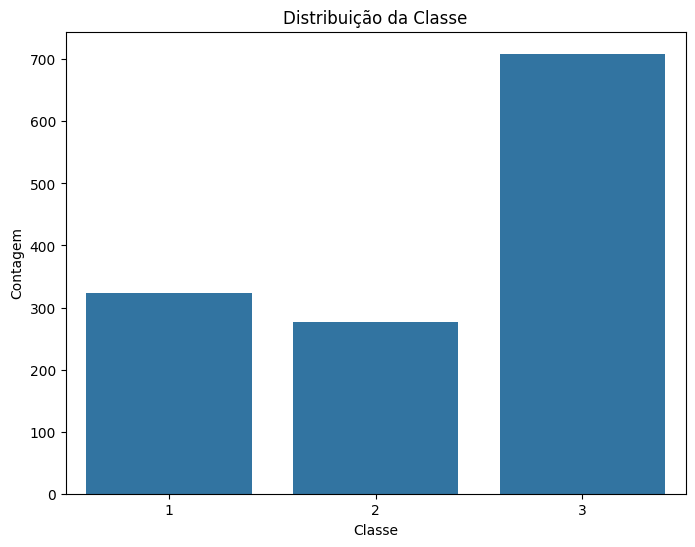

In [18]:
# Criando o gráfico de pizza para a coluna 'Pclass'
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df_full)
plt.title('Distribuição da Classe')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

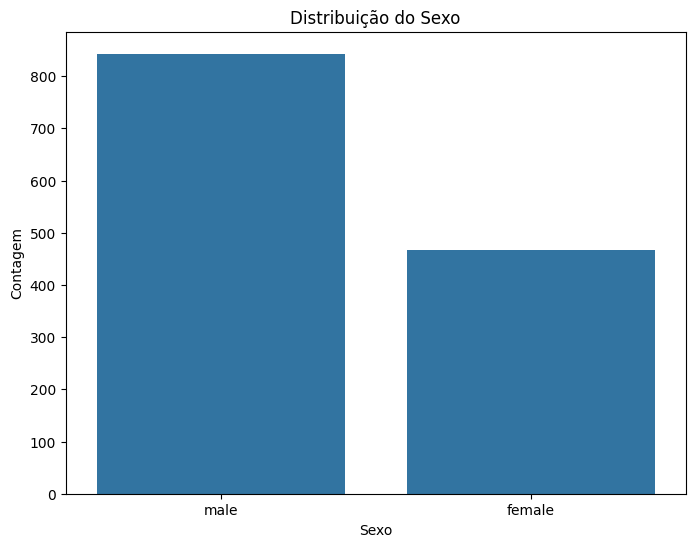

In [19]:
# Criando o gráfico de pizza para a coluna 'Sex'
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=df_full)
plt.title('Distribuição do Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()

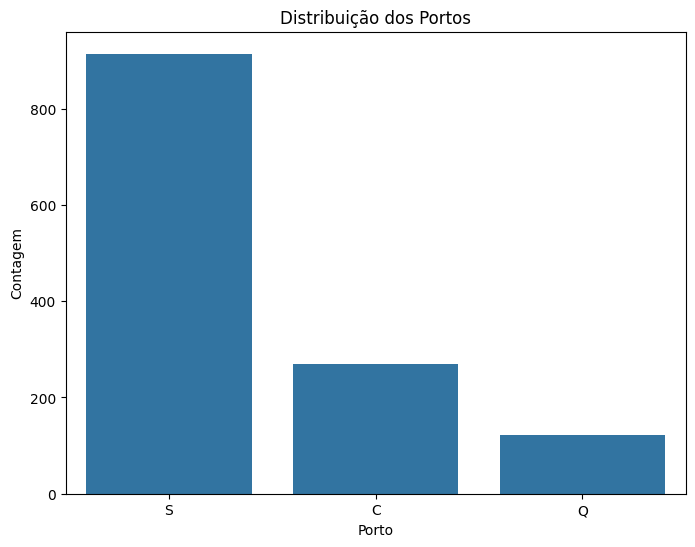

In [20]:
# Criando o gráfico de pizza para a coluna 'Embarked'
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=df_full)
plt.title('Distribuição dos Portos')
plt.xlabel('Porto')
plt.ylabel('Contagem')
plt.show()

# Inconsistent Values
- #### Como podemos ver nos graficos acima o DataFrame não possui valores inconsistentes, como uma idade negativa, ou um preço de uma passagem negativo, ou um numero negativo de parentes a bordo
- #### Porém observando a feature Fare existem outliers

In [21]:
# Verificando se existe algum registro com idade negativa
df_full.loc[df_full['Age'] < 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [22]:
# Verificando se existe algum registro com Fare negativo
df_full.loc[df_full['Fare'] < 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# Missing Data
- #### Vamos visualizar os dados nulos, para preenche-los separadamente por feature
    - #### Desconsiderar o valor de Survived pois é a classe, isso aconteceu pois juntamos os DataFrames
    - #### Vamos criar um DataFrame final para inserirmos as features que serão usadas no pré-processamento
    - #### Não será adicionado nesse DataFrame as features PassengerId, Name e Ticket. Pois são dados categoricos e possuem alta cardinalidade, sendo assim não irão ajudar na previsão do modelo

In [23]:
# Visualizando a quantidade de dados nulos do maior para o menor
df_full.isnull().sum().sort_values(ascending=False).head(12)

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
PassengerId       0
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
dtype: int64

In [24]:
# Quantidade de dados nulos em porcentagem
(df_full.isnull().mean() * 100).sort_values(ascending=False).head(12)

Cabin          77.463713
Survived       31.932773
Age            20.091673
Embarked        0.152788
Fare            0.076394
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
dtype: float64

In [25]:
# Visualizando a cardinalidade dos dados (valores únicos)
df_full.nunique().sort_values(ascending=False).head(12)

PassengerId    1309
Name           1307
Ticket          929
Fare            281
Cabin           186
Age              98
Parch             8
SibSp             7
Pclass            3
Embarked          3
Survived          2
Sex               2
dtype: int64

In [26]:
# Criando o DataFrame
df = pd.DataFrame()
# Passando a coluna para o DataFrame final
df['Survived'] = df_full['Survived']
# Visualizando
df

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
1304,NaN
1305,NaN
1306,NaN
1307,NaN


In [27]:
# Função para visualizar automaticamente as principais informações de cada feature
# Gera um gráfico de acordo com o tipo da variavel da feature
def check_feature(df, feature):
    qtd_unicos = df[feature].nunique()
    valores = df[feature].unique().tolist()
    qtd_nulos = df[feature].isnull().sum()
    qtd_valores = df[feature].value_counts()
    dtype = df[feature].dtype
    if dtype == 'O':
        if feature == 'Embarked' or feature == 'Cabin' or feature == 'Title':
            if feature == 'Title':
                sns.displot(df[feature], kde=True)
                plt.xticks(rotation=50)
            else:
                sns.displot(df[feature], kde=True)
        else:
            sns.countplot(data = df, x = feature, hue = 'Survived')
    elif dtype in ['int64', 'float64']:
        if qtd_unicos <= 10:
            sns.countplot(data = df, x = feature, hue = 'Survived')
        else:
            sns.displot(df[feature], kde = True)
    
    print(f"""Quantidade de valores únicos: {qtd_unicos}

Quais são os valores únicos: {', '.join(map(str, valores))}

Quantidade de valores nulos: {qtd_nulos}

Quantidade por valor: \n{qtd_valores}""")

Quantidade de valores únicos: 2

Quais são os valores únicos: 0.0, 1.0, nan

Quantidade de valores nulos: 418

Quantidade por valor: 
Survived
0.0    549
1.0    342
Name: count, dtype: int64


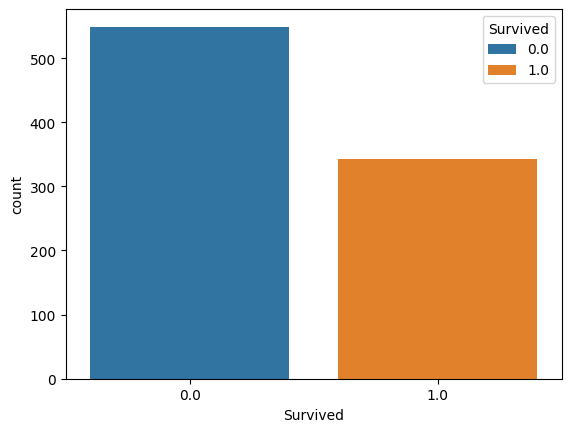

In [28]:
# 0 = Não sobreviveu, 1 = Sobreviveu
# Visualizando a classe (não existem dados nulos)
check_feature(df_full, 'Survived')

# Pclass
#### Entendendo a coluna Pclass
- **Pclass**: Classes dos passageiros
    - Não possui valores inconsistentes e nem nulos, portanto iremos adiciona-lo no DataFrame novo

Quantidade de valores únicos: 3

Quais são os valores únicos: 3, 1, 2

Quantidade de valores nulos: 0

Quantidade por valor: 
Pclass
3    709
1    323
2    277
Name: count, dtype: int64


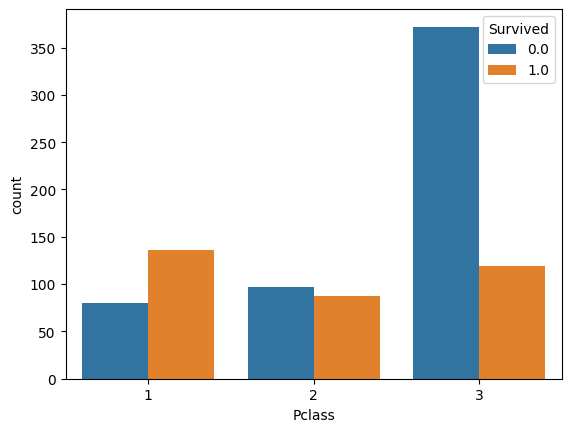

In [29]:
# Aplicando a função para ver as principais informações da coluna
check_feature(df_full, 'Pclass')

In [30]:
# Adicionando a feature Pclass no DF final
df['Pclass'] = df_full['Pclass']
df.head()

,Survived,Pclass
0,0.0,3
1,1.0,1
2,1.0,3
3,1.0,1
4,0.0,3


# Sex
#### Entendendo a coluna Sex
- **Sex**: Sexo dos passageiros
    - Não possui valores inconsistentes e nem nulos, portanto iremos adiciona-lo no DataFrame novo

Quantidade de valores únicos: 2

Quais são os valores únicos: male, female

Quantidade de valores nulos: 0

Quantidade por valor: 
Sex
male      843
female    466
Name: count, dtype: int64


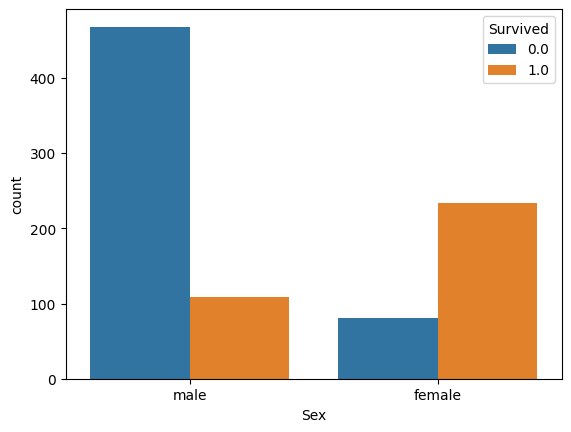

In [31]:
# Aplicando a função para ver as principais informações da coluna
check_feature(df_full, 'Sex')

In [32]:
# Adicionando a feature Sex no DF final
df['Sex'] = df_full['Sex']
df.head()

,Survived,Pclass,Sex
0,0.0,3,male
1,1.0,1,female
2,1.0,3,female
3,1.0,1,female
4,0.0,3,male


# SibSp/Parch
#### Entendendo as colunas SibSp e Parch

- **SibSp**: Nº de irmãos/cônjuges a bordo do Titanic
- **Parch**: Nº de pais/filhos a bordo do Titanic
    - Iremos adicionar o SibSp e Parch no dataframe final, pois iremos fazer o Feature Engineering posteriormente

Quantidade de valores únicos: 7

Quais são os valores únicos: 1, 0, 3, 4, 2, 5, 8

Quantidade de valores nulos: 0

Quantidade por valor: 
SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64


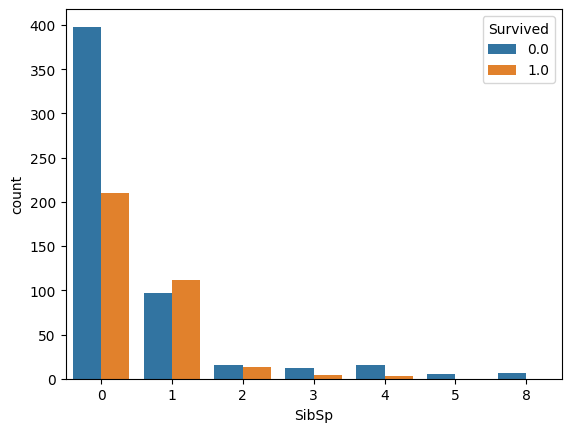

In [33]:
check_feature(df_full, 'SibSp')

In [34]:
df['SibSp'] = df_full['SibSp']
df.head()

,Survived,Pclass,Sex,SibSp
0,0.0,3,male,1
1,1.0,1,female,1
2,1.0,3,female,0
3,1.0,1,female,1
4,0.0,3,male,0


Quantidade de valores únicos: 8

Quais são os valores únicos: 0, 1, 2, 5, 3, 4, 6, 9

Quantidade de valores nulos: 0

Quantidade por valor: 
Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64


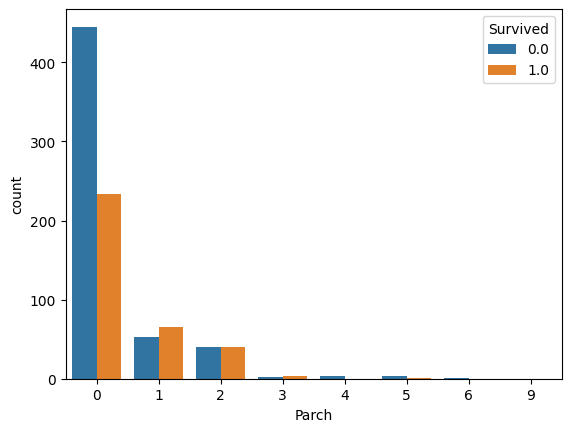

In [35]:
check_feature(df_full, 'Parch')

In [36]:
df['Parch'] = df_full['Parch']
df.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0.0,3,male,1,0
1,1.0,1,female,1,0
2,1.0,3,female,0,0
3,1.0,1,female,1,0
4,0.0,3,male,0,0


# Fare
#### Entendendo as coluna Fare

- **Fare**: Valor pago nos tickets do Titanic
    - Há apenas um passageiro sem valor `Fare`. Podemos assumir que `Fare` está relacionado ao tamanho da família (`Parch` e `SibSp`) e às características de `Pclass`. O valor médio da `tarifa` de um homem com passagem de terceira classe e sem família é uma escolha lógica para preencher o valor faltante.
    - Preenchendo o valor nulo com a mediana dos passageiros que são da 3° classe, embarcaram no portão de Southampton, são homens e estão sozinhos

Quantidade de valores únicos: 281

Quais são os valores únicos: 7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333, 30.0708, 16.7, 26.55, 31.275, 7.8542, 16.0, 29.125, 13.0, 18.0, 7.225, 26.0, 8.0292, 35.5, 31.3875, 263.0, 7.8792, 7.8958, 27.7208, 146.5208, 7.75, 10.5, 82.1708, 52.0, 7.2292, 11.2417, 9.475, 21.0, 41.5792, 15.5, 21.6792, 17.8, 39.6875, 7.8, 76.7292, 61.9792, 27.75, 46.9, 80.0, 83.475, 27.9, 15.2458, 8.1583, 8.6625, 73.5, 14.4542, 56.4958, 7.65, 29.0, 12.475, 9.0, 9.5, 7.7875, 47.1, 15.85, 34.375, 61.175, 20.575, 34.6542, 63.3583, 23.0, 77.2875, 8.6542, 7.775, 24.15, 9.825, 14.4583, 247.5208, 7.1417, 22.3583, 6.975, 7.05, 14.5, 15.0458, 26.2833, 9.2167, 79.2, 6.75, 11.5, 36.75, 7.7958, 12.525, 66.6, 7.3125, 61.3792, 7.7333, 69.55, 16.1, 15.75, 20.525, 55.0, 25.925, 33.5, 30.6958, 25.4667, 28.7125, 0.0, 15.05, 39.0, 22.025, 50.0, 8.4042, 6.4958, 10.4625, 18.7875, 31.0, 113.275, 27.0, 76.2917, 90.0, 9.35, 13.5, 7.55, 26.25, 12.275, 7.125, 52.5542, 20.2125, 

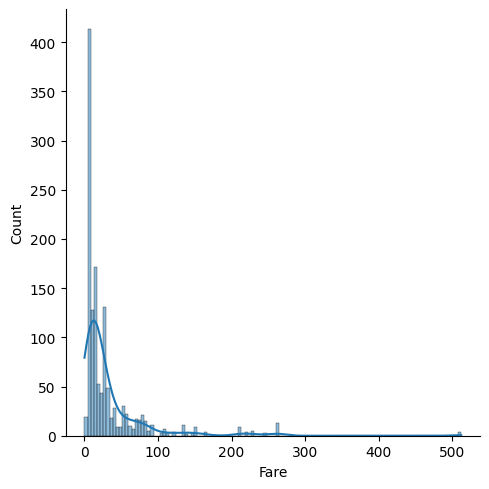

In [37]:
check_feature(df_full, 'Fare')

In [38]:
# Visualizando o unico registro com dado nulo na feature 'Fare'
df_full[df_full['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [39]:
# Verificando a mediana por classe
df_full.groupby('Pclass').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,323.0,87.508992,80.447178,0.0,30.6958,60.0000,107.6625,512.3292
2,277.0,21.179196,13.607122,0.0,13.0000,15.0458,26.0000,73.5000
3,708.0,13.302889,11.494358,0.0,7.7500,8.0500,15.2458,69.5500


In [40]:
# Pegando o valor da mediana
med_fare = df_full.groupby(['Pclass', 'Parch', 'SibSp', 'Sex', 'Embarked']).Fare.median()[3][0][0]['male']['S']

In [41]:
# Preenchendo o valor nulo
df_full['Fare'] = df_full['Fare'].fillna(med_fare)

In [42]:
# Verificando se ainda existem valores nulos na feature
df_full['Fare'].isnull().sum()

0

In [43]:
# Verificando o registro se consta o valor que preenchemos
df_full.iloc[1043].to_frame().T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,7.8958,NaN,S


In [44]:
# Ajustar os valores de Fare para apenas 2 casas decimais
df_full['Fare'] = df_full['Fare'].round(2)

In [45]:
# Adicionando a feature Fare no DF final
df['Fare'] = df_full['Fare']
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0.0,3,male,1,0,7.25
1,1.0,1,female,1,0,71.28
2,1.0,3,female,0,0,7.92
3,1.0,1,female,1,0,53.10
4,0.0,3,male,0,0,8.05


# Embarked
#### Entendendo as coluna Embarked

- **Embarked**: Portão de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)
    - Iremos preencher os dois valores nulos com a moda e inserir no DataFrame final

Quantidade de valores únicos: 3

Quais são os valores únicos: S, C, Q, nan

Quantidade de valores nulos: 2

Quantidade por valor: 
Embarked
S    914
C    270
Q    123
Name: count, dtype: int64


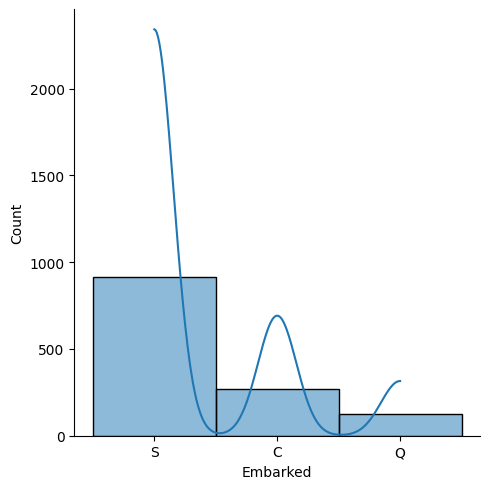

In [46]:
check_feature(df_full, 'Embarked')

In [47]:
# Visualizando os registros que são nulos na feature 'Embarked'
df_full[df_full['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [48]:
# Media de sobrevivencia por portão
df_full.groupby('Embarked').Survived.mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [49]:
# Media de classe que embarcaram por portão
df_full.groupby('Embarked').Pclass.mean()

Embarked
C    1.851852
Q    2.894309
S    2.347921
Name: Pclass, dtype: float64

In [50]:
# Como são apenas 2 registros nulos vamos preenche-lo com a moda
df_full['Embarked'] = df_full['Embarked'].fillna('S')

In [51]:
# Verificando se ainda existem valores nulos na feature
df_full['Embarked'].isnull().sum()

0

In [52]:
# Verificando o registro se consta o valor que preenchemos
df_full.iloc[61].to_frame().T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S


In [53]:
# Verificando o registro se consta o valor que preenchemos
df_full.iloc[829].to_frame().T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [54]:
# Adicionando a feature Embarked no DF final
df['Embarked'] = df_full['Embarked']
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0.0,3,male,1,0,7.25,S
1,1.0,1,female,1,0,71.28,C
2,1.0,3,female,0,0,7.92,S
3,1.0,1,female,1,0,53.10,S
4,0.0,3,male,0,0,8.05,S


# Cabin
#### Entendendo as coluna Cabin

- **Cabin**: Cabine de cada passageiro
    - Grande parte da feature `Cabin` está faltando, apesar de ser recomendado excluir uma feature que possue uma quantidade grande de valores nulos o recurso em si não pode ser completamente ignorado porque algumas cabines podem ter taxas de sobrevivência mais altas
    - Acontece que a primeira letra dos valores `Cabin` são os decks nos quais as cabines estão localizadas. Esses conveses eram separados principalmente para uma classe de passageiros, mas alguns deles eram usados por várias classes de passageiros.
    - Vamos preencher os valores ausentes de acordo com o `Pclass`, formando 3 subgrupos que correspodem os decks que cada classe estava a bordo.

<img src="img/Titanic_side_plan.webp">

In [55]:
# Criando a Feature Deck
# M, C, E, G, D, A, B, F, T
# M para valores faltantes
df_full['Deck'] = df_full['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df_full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S,M
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.90,C105,C,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,NaN,S,M
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.05,NaN,S,M


Quantidade de valores únicos: 9

Quais são os valores únicos: M, C, E, G, D, A, B, F, T

Quantidade de valores nulos: 0

Quantidade por valor: 
Deck
M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64


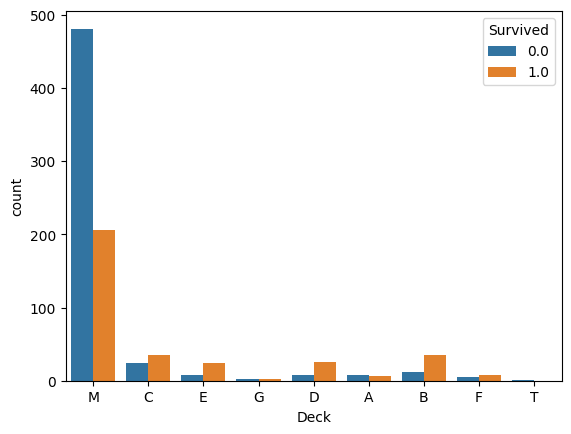

In [56]:
check_feature(df_full, 'Deck')

In [57]:
# Contagem dos passageiros por deck e classe
count = df_full.groupby(['Deck', 'Pclass']).size().reset_index(name='Count')
count

,Deck,Pclass,Count
0,A,1,22
1,B,1,65
2,C,1,94
3,D,1,40
4,D,2,6
5,E,1,34
6,E,2,4
7,E,3,3
8,F,2,13
9,F,3,8


In [58]:
# Calcular a porcentagem por deck
count['Percentage'] = count.groupby('Deck')['Count'].transform(lambda x: (x / x.sum()) * 100)
count

,Deck,Pclass,Count,Percentage
0,A,1,22,100.000000
1,B,1,65,100.000000
2,C,1,94,100.000000
3,D,1,40,86.956522
4,D,2,6,13.043478
5,E,1,34,82.926829
6,E,2,4,9.756098
7,E,3,3,7.317073
8,F,2,13,61.904762
9,F,3,8,38.095238


- #### Pclass 1: Decks A, B, C, D, E, M
    - #### Decks ABC são 100% da primeira classe
- #### Pclass 2: Decks D, E, F, M
    - #### 13% no Deck D, 9% no Deck E, 61% Deck F
- #### Pclass 3: Decks E, F, G, M
    - #### 7% no Deck D, 38% Deck F, 100% Deck G, 68% Deck M

In [59]:
# Pclass 1: Decks A, B, C, D, E
# Pclass 2: Decks D, E, F
# Pclass 3: Decks E, F, G
# Função para mapear os decks de acordo com a classe do passageiro
def mapear_decks(classe):
    if classe == 1:
        return 'ABCDE'
    elif classe == 2:
        return 'DEF'
    elif classe == 3:
        return 'EFG'
    else:
        return 'M'


df_full['Deck'] = df_full['Pclass'].apply(mapear_decks)
df_full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,EFG
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,ABCDE
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S,EFG
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,ABCDE
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,EFG
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S,EFG
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.90,C105,C,ABCDE
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,NaN,S,EFG
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.05,NaN,S,EFG


Quantidade de valores únicos: 3

Quais são os valores únicos: EFG, ABCDE, DEF

Quantidade de valores nulos: 0

Quantidade por valor: 
Deck
EFG      709
ABCDE    323
DEF      277
Name: count, dtype: int64


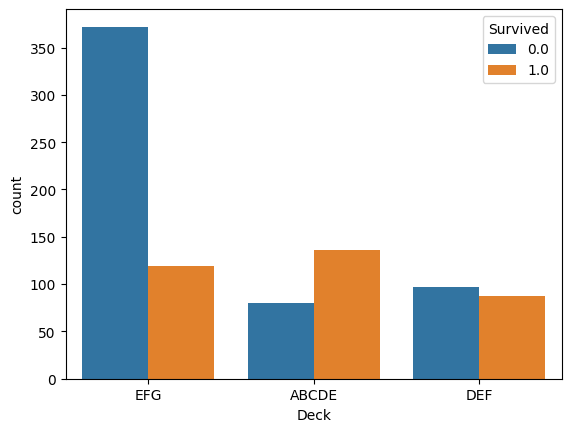

In [60]:
check_feature(df_full, 'Deck')

In [61]:
# Adicionando a feature Deck no DF novo
df['Deck'] = df_full['Deck']
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Deck
0,0.0,3,male,1,0,7.25,S,EFG
1,1.0,1,female,1,0,71.28,C,ABCDE
2,1.0,3,female,0,0,7.92,S,EFG
3,1.0,1,female,1,0,53.10,S,ABCDE
4,0.0,3,male,0,0,8.05,S,EFG


# Title
#### Entendendo as coluna Title

- **Title**: Título de cada passageiro
    - Será usada também para auxiliar no preenchimendo dos dados faltantes de Age
    - Vamos deixar apenas 4 titulos, Mr, Master, Miss/Mrs/Ms e Dr/Military/Noble/Clergy

In [62]:
# Visualizando o formato dos nomes
df_full['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [63]:
# Função que retorna uma lista somente com os titulos de cada passageiro
def pega_titulo(df, coluna):
    lista = []
    for nome in df[coluna]:
        b = nome.split(',')
        c = b[1][1::]
        d = c.split('.')
        titulo = d[0]
        lista.append(titulo)
    return lista

In [64]:
# Aplicando a função
lista = pega_titulo(df_full, 'Name')

In [65]:
# Criando a feature 'Title'
df_full['Title'] = lista

In [66]:
# Visualizando
df_full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,EFG,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,ABCDE,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S,EFG,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,ABCDE,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,EFG,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S,EFG,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.90,C105,C,ABCDE,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,NaN,S,EFG,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.05,NaN,S,EFG,Mr


Quantidade de valores únicos: 18

Quais são os valores únicos: Mr, Mrs, Miss, Master, Don, Rev, Dr, Mme, Ms, Major, Lady, Sir, Mlle, Col, Capt, the Countess, Jonkheer, Dona

Quantidade de valores nulos: 0

Quantidade por valor: 
Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64


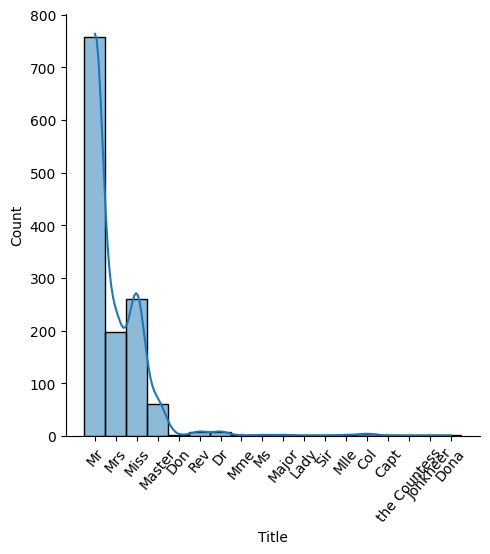

In [67]:
# Visualizando
check_feature(df_full, 'Title')

# Entendendo os titulos
- Mr: Homens, independente se são casados
- Mrs: Mulheres casadas
- Miss: Mulheres solteiras
- Ms: Mulheres, tanto solteiras ou casadas
- Master: Homens, com menos de 18 anos

In [68]:
# Visualizando os registros que possuem 'Dona' na feature 'Title'
df_full.loc[df_full.Title.isin(['Dona'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,ABCDE,Dona


In [69]:
# Média de sobrevivencia por titulo
df_full.groupby('Title').Survived.mean()

Title
Capt            0.000000
Col             0.500000
Don             0.000000
Dona                 NaN
Dr              0.428571
Jonkheer        0.000000
Lady            1.000000
Major           0.500000
Master          0.575000
Miss            0.697802
Mlle            1.000000
Mme             1.000000
Mr              0.156673
Mrs             0.792000
Ms              1.000000
Rev             0.000000
Sir             1.000000
the Countess    1.000000
Name: Survived, dtype: float64

In [70]:
miss = df_full[df_full['Title'] == 'Miss']['Survived'].mean()
mrs = df_full[df_full['Title'] == 'Mrs']['Survived'].mean()
ms = df_full[df_full['Title'] == 'Ms']['Survived'].mean()

print(f'A média de sobrevivencia das mulheres com titulo de Miss é {miss}')
print(f'A média de sobrevivencia das mulheres com titulo de Mrs é {mrs}')
print(f'A média de sobrevivencia das mulheres com titulo de Ms é {ms}')

A média de sobrevivencia das mulheres com titulo de Miss é 0.6978021978021978
A média de sobrevivencia das mulheres com titulo de Mrs é 0.792
A média de sobrevivencia das mulheres com titulo de Ms é 1.0


In [71]:
# Visualizando os registros que possuem 'Jonkheer' na feature 'Title'
df_full.loc[df_full.Title.isin(['Jonkheer'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
822,823,0.0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,ABCDE,Jonkheer


In [72]:
df_full.loc[df_full.Title.isin(['the Countess'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
759,760,1.0,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,ABCDE,the Countess


In [73]:
df_full.loc[df_full.Title.isin(['Capt'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
745,746,0.0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,ABCDE,Capt


In [74]:
df_full.loc[df_full.Title.isin(['Col'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
647,648,1.0,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.50,A26,C,ABCDE,Col
694,695,0.0,1,"Weir, Col. John",male,60.0,0,0,113800,26.55,NaN,S,ABCDE,Col
1022,1023,NaN,1,"Gracie, Col. Archibald IV",male,53.0,0,0,113780,28.50,C51,C,ABCDE,Col
1093,1094,NaN,1,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.52,C62 C64,C,ABCDE,Col


In [75]:
df_full.loc[df_full.Title.isin(['Mlle'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
641,642,1.0,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3,B35,C,ABCDE,Mlle
710,711,1.0,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5,C90,C,ABCDE,Mlle


In [76]:
df_full.loc[df_full.Title.isin(['Sir'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
599,600,1.0,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.93,A20,C,ABCDE,Sir


In [77]:
df_full.loc[df_full.Title.isin(['Lady'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
556,557,1.0,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6,A16,C,ABCDE,Lady


In [78]:
df_full.loc[df_full.Title.isin(['Major'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
449,450,1.0,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.50,C104,S,ABCDE,Major
536,537,0.0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.55,B38,S,ABCDE,Major


In [79]:
df_full.loc[df_full.Title.isin(['Mme'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
369,370,1.0,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3,B35,C,ABCDE,Mme


In [80]:
df_full.loc[df_full.Title.isin(['Don'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
30,31,0.0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.72,NaN,C,ABCDE,Don


In [81]:
df_full.loc[df_full.Title.isin(['Dr'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
245,246,0.0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.00,C78,Q,ABCDE,Dr
317,318,0.0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.00,NaN,S,DEF,Dr
398,399,0.0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.50,NaN,S,DEF,Dr
632,633,1.0,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.50,B50,C,ABCDE,Dr
660,661,1.0,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.65,NaN,S,ABCDE,Dr
766,767,0.0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.60,NaN,C,ABCDE,Dr
796,797,1.0,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.93,D17,S,ABCDE,Dr
1184,1185,NaN,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.86,A34,S,ABCDE,Dr


In [82]:
df_full.loc[df_full.Title.isin(['Rev'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
149,150,0.0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.00,NaN,S,DEF,Rev
150,151,0.0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.52,NaN,S,DEF,Rev
249,250,0.0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.00,NaN,S,DEF,Rev
626,627,0.0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.35,NaN,Q,DEF,Rev
848,849,0.0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.00,NaN,S,DEF,Rev
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,DEF,Rev
1040,1041,NaN,2,"Lahtinen, Rev. William",male,30.0,1,1,250651,26.00,NaN,S,DEF,Rev
1055,1056,NaN,2,"Peruschitz, Rev. Joseph Maria",male,41.0,0,0,237393,13.00,NaN,S,DEF,Rev


In [83]:
# Os titulos abaixo se referem a mulheres, portanto iremos agrupa-los somente em Miss/Mrs/Ms
df_full['Title'] = df_full['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')

In [84]:
# Os titulos abaixo ocorrem pouquíssimas vezes, poranto iremos considerar que os titulos abaixo sejam Dr/Military/Noble/Clergy
df_full['Title'] = df_full['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

Quantidade de valores únicos: 4

Quais são os valores únicos: Mr, Miss/Mrs/Ms, Master, Dr/Military/Noble/Clergy

Quantidade de valores nulos: 0

Quantidade por valor: 
Title
Mr                          757
Miss/Mrs/Ms                 465
Master                       61
Dr/Military/Noble/Clergy     26
Name: count, dtype: int64


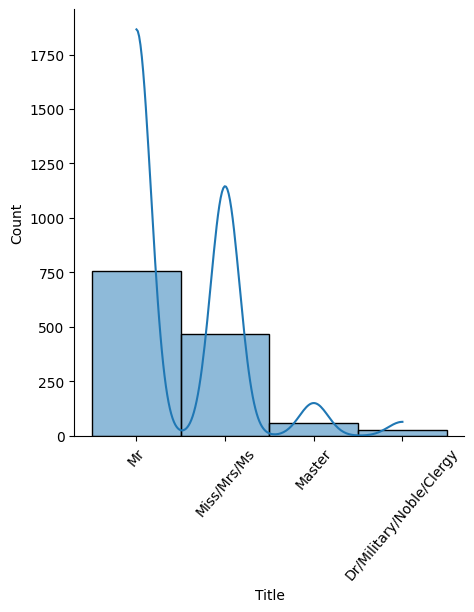

In [85]:
check_feature(df_full, 'Title')

In [86]:
# Adicionando a feature Title no DF novo
df['Title'] = df_full['Title']
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Deck,Title
0,0.0,3,male,1,0,7.25,S,EFG,Mr
1,1.0,1,female,1,0,71.28,C,ABCDE,Miss/Mrs/Ms
2,1.0,3,female,0,0,7.92,S,EFG,Miss/Mrs/Ms
3,1.0,1,female,1,0,53.10,S,ABCDE,Miss/Mrs/Ms
4,0.0,3,male,0,0,8.05,S,EFG,Mr


# Age
#### Entendendo a coluna Age
- **Age**: Idade dos passageiros
    - Possui 263 valores ausentes
    - Os valores ausentes em Age são preenchidos com a idade mediana, mas usar a idade mediana de todo o conjunto de dados não é uma boa escolha. A idade mediana dos grupos `Pclass` é a melhor escolha devido à sua alta correlação com `Idade`. Também é mais lógico agrupar as idades por classes de passageiros em vez de outras características.

Quantidade de valores únicos: 98

Quais são os valores únicos: 22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0, 20.0, 39.0, 55.0, 31.0, 34.0, 15.0, 28.0, 8.0, 19.0, 40.0, 66.0, 42.0, 21.0, 18.0, 3.0, 7.0, 49.0, 29.0, 65.0, 28.5, 5.0, 11.0, 45.0, 17.0, 32.0, 16.0, 25.0, 0.83, 30.0, 33.0, 23.0, 24.0, 46.0, 59.0, 71.0, 37.0, 47.0, 14.5, 70.5, 32.5, 12.0, 9.0, 36.5, 51.0, 55.5, 40.5, 44.0, 1.0, 61.0, 56.0, 50.0, 36.0, 45.5, 20.5, 62.0, 41.0, 52.0, 63.0, 23.5, 0.92, 43.0, 60.0, 10.0, 64.0, 13.0, 48.0, 0.75, 53.0, 57.0, 80.0, 70.0, 24.5, 6.0, 0.67, 30.5, 0.42, 34.5, 74.0, 22.5, 18.5, 67.0, 76.0, 26.5, 60.5, 11.5, 0.33, 0.17, 38.5

Quantidade de valores nulos: 263

Quantidade por valor: 
Age
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: count, Length: 98, dtype: int64


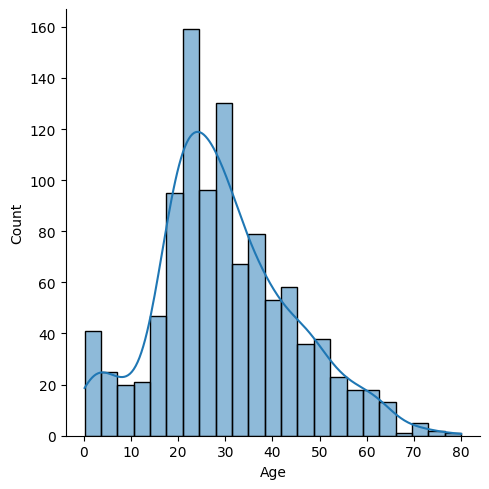

In [87]:
check_feature(df_full, 'Age')

In [88]:
primeira = df_full[df_full['Age'].isnull() & (df_full['Pclass'] == 1)].shape[0]
segunda = df_full[df_full['Age'].isnull() & (df_full['Pclass'] == 2)].shape[0]
terceira = df_full[df_full['Age'].isnull() & (df_full['Pclass'] == 3)].shape[0]

print(f'Quantidade de registros nulos na feature Age da 1° classe: {primeira}')
print(f'Quantidade de registros nulos na feature Age da 2° classe: {segunda}')
print(f'Quantidade de registros nulos na feature Age da 3° classe: {terceira}')

Quantidade de registros nulos na feature Age da 1° classe: 39
Quantidade de registros nulos na feature Age da 2° classe: 16
Quantidade de registros nulos na feature Age da 3° classe: 208


In [89]:
# Pegando a media de idade de cada classe
df_full.groupby('Pclass').Age.mean()

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [90]:
# Pegando a mediana de idade de cada classe
df_full.groupby('Pclass').Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [91]:
# Pegando as medianas de idade dos sexos e das classes
m_3 = df_full[(df_full['Pclass'] == 3) & (df_full['Sex'] == 'male')]['Age'].median()
f_3 = df_full[(df_full['Pclass'] == 3) & (df_full['Sex'] == 'female')]['Age'].median()
m_2 = df_full[(df_full['Pclass'] == 2) & (df_full['Sex'] == 'male')]['Age'].median()
f_2 = df_full[(df_full['Pclass'] == 2) & (df_full['Sex'] == 'female')]['Age'].median()
m_1 = df_full[(df_full['Pclass'] == 1) & (df_full['Sex'] == 'male')]['Age'].median()
f_1 = df_full[(df_full['Pclass'] == 1) & (df_full['Sex'] == 'female')]['Age'].median()

print(f'Mediana Homens 3 classe: {m_3}')
print(f'Mediana Homens 2 classe: {m_2}')
print(f'Mediana Homens 1 classe: {m_1}')
print(f'Mediana Mulheres 3 classe: {f_3}')
print(f'Mediana Mulheres 2 classe: {f_2}')
print(f'Mediana Mulheres 1 classe: {f_1}')

Mediana Homens 3 classe: 25.0
Mediana Homens 2 classe: 29.5
Mediana Homens 1 classe: 42.0
Mediana Mulheres 3 classe: 22.0
Mediana Mulheres 2 classe: 28.0
Mediana Mulheres 1 classe: 36.0


In [92]:
# Pegando a media de idade por titulo
df_full.groupby('Title')['Age'].mean()

Title
Dr/Military/Noble/Clergy    45.800000
Master                       5.482642
Miss/Mrs/Ms                 28.634599
Mr                          32.252151
Name: Age, dtype: float64

In [93]:
# Pegando a mediana de idade por titulo
df_full.groupby('Title')['Age'].median()

Title
Dr/Military/Noble/Clergy    49.0
Master                       4.0
Miss/Mrs/Ms                 27.0
Mr                          29.0
Name: Age, dtype: float64

In [94]:
# Mediana por titulo e classe
mr_3 = df_full[(df_full['Pclass'] == 3) & (df_full['Title'] == 'Mr')]['Age'].median()
miss_3 = df_full[(df_full['Pclass'] == 3) & (df_full['Title'] == 'Miss/Mrs/Ms')]['Age'].median()
m_3 = df_full[(df_full['Pclass'] == 3) & (df_full['Title'] == 'Master')]['Age'].median()
dr_3 = df_full[(df_full['Pclass'] == 3) & (df_full['Title'] == 'Dr/Military/Noble/Clergy')]['Age'].median()

mr_2 = df_full[(df_full['Pclass'] == 2) & (df_full['Title'] == 'Mr')]['Age'].median()
miss_2 = df_full[(df_full['Pclass'] == 2) & (df_full['Title'] == 'Miss/Mrs/Ms')]['Age'].median()
m_2 = df_full[(df_full['Pclass'] == 2) & (df_full['Title'] == 'Master')]['Age'].median()
dr_2 = df_full[(df_full['Pclass'] == 2) & (df_full['Title'] == 'Dr/Military/Noble/Clergy')]['Age'].median()

mr_1 = df_full[(df_full['Pclass'] == 1) & (df_full['Title'] == 'Mr')]['Age'].median()
miss_1 = df_full[(df_full['Pclass'] == 1) & (df_full['Title'] == 'Miss/Mrs/Ms')]['Age'].median()
m_1 = df_full[(df_full['Pclass'] == 1) & (df_full['Title'] == 'Master')]['Age'].median()
dr_1 = df_full[(df_full['Pclass'] == 1) & (df_full['Title'] == 'Dr/Military/Noble/Clergy')]['Age'].median()

print(f'Mediana Mr 3 classe: {mr_3}')
print(f'Mediana Mr 2 classe: {mr_2}')
print(f'Mediana Mr 1 classe: {mr_1}')
print(f'Mediana Miss/Mrs/Ms 3 classe: {miss_3}')
print(f'Mediana Miss/Mrs/Ms 2 classe: {miss_2}')
print(f'Mediana Miss/Mrs/Ms 1 classe: {miss_1}')
print(f'Mediana Master 3 classe: {m_3}')
print(f'Mediana Master 2 classe: {m_2}')
print(f'Mediana Master 1 classe: {m_1}')
print(f'Mediana Dr/Military/Noble/Clergy 3 classe: {dr_3}')
print(f'Mediana Dr/Military/Noble/Clergy 2 classe: {dr_2}')
print(f'Mediana Dr/Military/Noble/Clergy 1 classe: {dr_1}')

Mediana Mr 3 classe: 26.0
Mediana Mr 2 classe: 30.0
Mediana Mr 1 classe: 41.5
Mediana Miss/Mrs/Ms 3 classe: 22.0
Mediana Miss/Mrs/Ms 2 classe: 28.0
Mediana Miss/Mrs/Ms 1 classe: 35.5
Mediana Master 3 classe: 6.0
Mediana Master 2 classe: 2.0
Mediana Master 1 classe: 6.0
Mediana Dr/Military/Noble/Clergy 3 classe: nan
Mediana Dr/Military/Noble/Clergy 2 classe: 41.5
Mediana Dr/Military/Noble/Clergy 1 classe: 49.0


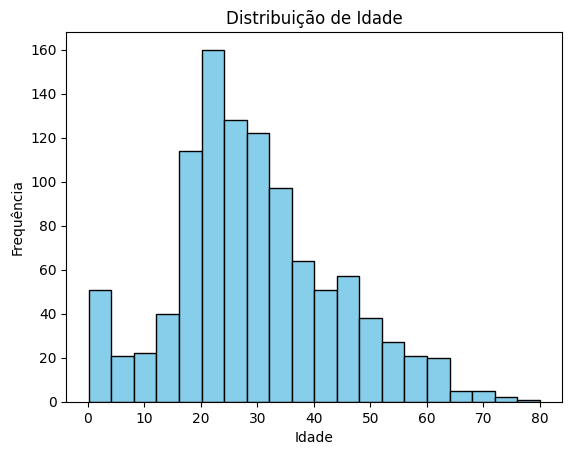

In [95]:
# Verificando a distribuição dos dados
# Histograma da coluna 'Age'
plt.hist(df_full['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição de Idade')
plt.show()

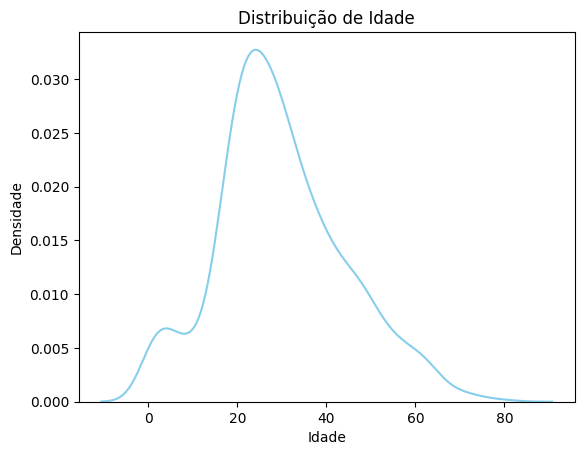

In [96]:
# Verificando a distribuição dos dados
# Gráfico de densidade
sns.kdeplot(df_full['Age'], color='skyblue')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.title('Distribuição de Idade')
plt.show()

In [97]:
# Fazendo o teste de Shapiro para identificar se Age possui uma distribuição normal
alpha = 0.05
_, p_value = shapiro(df_full['Age'].dropna())

if p_value > alpha:
    print("Os dados seguem uma distribuição normal")
else:
    print("Os dados não seguem uma distribuição normal")

Os dados não seguem uma distribuição normal


In [98]:
# O desvio padrão de Age é 14, portanto as idades variam 14 anos para mais ou para menos
df_full['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [99]:
# Pegando a mediana de idade da 3 classe pelo titulo 'Master' 
df_full[(df_full['Pclass'] == 3) & (df_full['Title'] == 'Master')]['Age'].median()

6.0

In [100]:
# Registros com titulo Master e que são da terceira classe:
# 37 registros
# Media: 6
# Desvio padrão: 4
df_full[(df_full['Pclass'] == 3) & (df_full['Title'] == 'Master')]['Age'].describe()

count    37.000000
mean      6.090000
std       4.152566
min       0.330000
25%       2.000000
50%       6.000000
75%       9.000000
max      14.500000
Name: Age, dtype: float64

In [101]:
# Verificando os registros que possuem o titulo 'Master' com a idade nula
df_full.loc[(df_full['Title'] == 'Master') & (df_full['Age'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
65,66,1.0,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.25,NaN,C,EFG,Master
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,EFG,Master
176,177,0.0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.47,NaN,S,EFG,Master
709,710,1.0,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.25,NaN,C,EFG,Master
1135,1136,NaN,3,"Johnston, Master. William Arthur Willie""""",male,NaN,1,2,W./C. 6607,23.45,NaN,S,EFG,Master
1230,1231,NaN,3,"Betros, Master. Seman",male,NaN,0,0,2622,7.23,NaN,C,EFG,Master
1235,1236,NaN,3,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.50,NaN,S,EFG,Master
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.36,NaN,C,EFG,Master


- #### Todos os registros com idades nulas e titulo 'Master' são da 3 classe, portanto a média de idades é 6, e variam 4 anos para mais ou para menos

In [102]:
# Pegando a media de idade da 3 classe e sexo feminino 
df_full[(df_full['Pclass'] == 3) & (df_full['Sex'] == 'female')]['Age'].mean()

22.185328947368422

In [103]:
# Verificando os registros que possuem o titulo 'Mr' com a idade nula
df_full.loc[(df_full['Title'] == 'Mr') & (df_full['Age'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.46,NaN,Q,EFG,Mr
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.00,NaN,S,DEF,Mr
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.22,NaN,C,EFG,Mr
29,30,0.0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.90,NaN,S,EFG,Mr
36,37,1.0,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.23,NaN,C,EFG,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,NaN,3,"Caram, Mr. Joseph",male,NaN,1,0,2689,14.46,NaN,C,EFG,Mr
1271,1272,NaN,3,"O'Connor, Mr. Patrick",male,NaN,0,0,366713,7.75,NaN,Q,EFG,Mr
1275,1276,NaN,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.88,NaN,S,DEF,Mr
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S,EFG,Mr


In [104]:
# Registros com titulo Mrs e que são da 3 classe:
# Media: 28
# Desvio padrão: 9
df_full[(df_full['Pclass'] == 3) & (df_full['Title'] == 'Mr')]['Age'].describe()

count    312.000000
mean      28.318910
std        9.907858
min       11.000000
25%       21.000000
50%       26.000000
75%       33.000000
max       74.000000
Name: Age, dtype: float64

In [105]:
# Registros com titulo Mrs e que são da 2 classe:
# Media: 32
# Desvio padrão: 12
df_full[(df_full['Pclass'] == 2) & (df_full['Title'] == 'Mr')]['Age'].describe()

count    137.000000
mean      32.346715
std       11.862038
min       14.000000
25%       24.000000
50%       30.000000
75%       38.000000
max       70.000000
Name: Age, dtype: float64

In [106]:
# Registros com titulo Mrs e que são da 2 classe:
# Media: 42
# Desvio padrão: 13
df_full[(df_full['Pclass'] == 1) & (df_full['Title'] == 'Mr')]['Age'].describe()

count    132.000000
mean      41.450758
std       13.489020
min       17.000000
25%       30.000000
50%       41.500000
75%       50.000000
max       80.000000
Name: Age, dtype: float64

# Data Cleaning

In [107]:
# Função para preencher os dados nulos na coluna Age
# 4 valores já foram preenchidos manualmente
from random import randint

def preencher_nulos(row):
    if pd.isnull(row['Age']):
        if row['Title'] == 'Mr':
            if row['Pclass'] == 3:
                return randint(25, 26)
            elif row['Pclass'] == 2:
                return randint(29, 30)
            elif row['Pclass'] == 1:
                return randint(41, 42)
        elif row['Title'] == 'Miss/Mrs/Ms':
            if row['Pclass'] == 3:
                return 22
            elif row['Pclass'] == 2:
                return 28
            elif row['Pclass'] == 1:
                return randint(35, 36)
        elif row['Title'] == 'Master':
            return 6
        elif row['Title'] == 'Dr/Military/Noble/Clergy':
            if row['Pclass'] == 2:
                return 41
            if row['Pclass'] == 1:
                return 49
    else:
        return row['Age']

In [108]:
df_full['Age'] = df_full.apply(preencher_nulos, axis=1)

Quantidade de valores únicos: 98

Quais são os valores únicos: 22.0, 38.0, 26.0, 35.0, 25.0, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0, 20.0, 39.0, 55.0, 29.0, 31.0, 34.0, 15.0, 28.0, 8.0, 19.0, 40.0, 36.0, 66.0, 42.0, 21.0, 18.0, 3.0, 7.0, 49.0, 65.0, 41.0, 28.5, 5.0, 11.0, 45.0, 6.0, 17.0, 32.0, 16.0, 0.83, 30.0, 33.0, 23.0, 24.0, 46.0, 59.0, 71.0, 37.0, 47.0, 14.5, 70.5, 32.5, 12.0, 9.0, 36.5, 51.0, 55.5, 40.5, 44.0, 1.0, 61.0, 56.0, 50.0, 45.5, 20.5, 62.0, 52.0, 63.0, 23.5, 0.92, 43.0, 60.0, 10.0, 64.0, 13.0, 48.0, 0.75, 53.0, 57.0, 80.0, 70.0, 24.5, 0.67, 30.5, 0.42, 34.5, 74.0, 22.5, 18.5, 67.0, 76.0, 26.5, 60.5, 11.5, 0.33, 0.17, 38.5

Quantidade de valores nulos: 0

Quantidade por valor: 
Age
22.00    107
26.00    100
25.00    100
24.00     47
30.00     46
        ... 
20.50      1
0.67       1
24.50      1
70.50      1
38.50      1
Name: count, Length: 98, dtype: int64


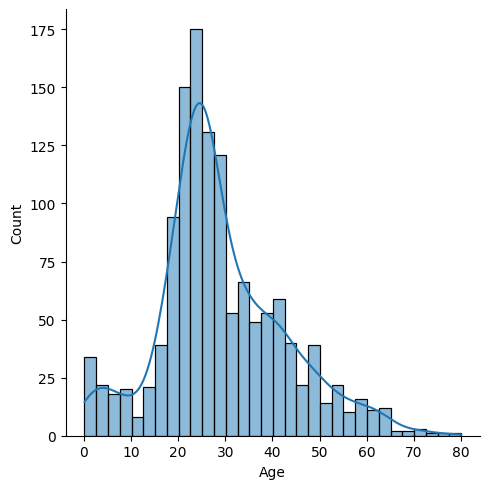

In [109]:
check_feature(df_full, 'Age')

In [110]:
# Transformando a idade em um numero inteiro
df_full['Age'] = df_full['Age'].astype('int64')

In [111]:
# Configurando o Pandas para exibir o output completo, somente nesse codigo
# Para vermos como ficou a distribuição das idades
with pd.option_context('display.max_rows', None):
    print(df_full['Age'].value_counts().sort_index())

Age
0      12
1      10
2      12
3       7
4      10
5       5
6      14
7       4
8       6
9      10
10      4
11      5
12      3
13      5
14     10
15      6
16     19
17     20
18     42
19     29
20     24
21     41
22    108
23     27
24     48
25    100
26    101
27     30
28     38
29     37
30     48
31     23
32     28
33     21
34     18
35     27
36     40
37      9
38     15
39     20
40     21
41     26
42     30
43      9
44     10
45     23
46      6
47     14
48     14
49     10
50     15
51      8
52      6
53      4
54     10
55      9
56      4
57      5
58      6
59      3
60      8
61      5
62      5
63      4
64      5
65      3
66      1
67      1
70      3
71      2
74      1
76      1
80      1
Name: count, dtype: int64


Quantidade de valores únicos: 73

Quais são os valores únicos: 22, 38, 26, 35, 25, 54, 2, 27, 14, 4, 58, 20, 39, 55, 29, 31, 34, 15, 28, 8, 19, 40, 36, 66, 42, 21, 18, 3, 7, 49, 65, 41, 5, 11, 45, 6, 17, 32, 16, 0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12, 9, 51, 44, 1, 61, 56, 50, 62, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57, 80, 74, 67, 76

Quantidade de valores nulos: 0

Quantidade por valor: 
Age
22    108
26    101
25    100
24     48
30     48
     ... 
74      1
67      1
66      1
80      1
76      1
Name: count, Length: 73, dtype: int64


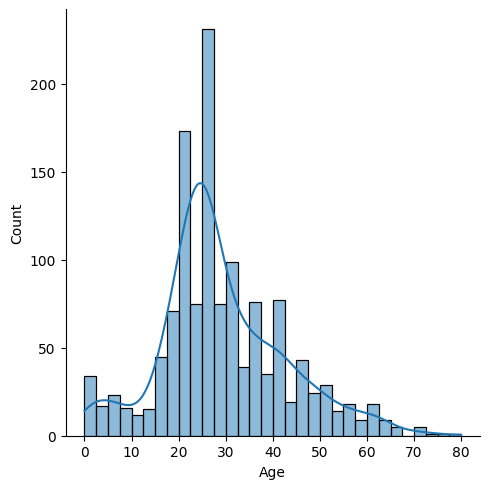

In [112]:
check_feature(df_full, 'Age')

In [113]:
df['Age'] = df_full['Age']
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Deck,Title,Age
0,0.0,3,male,1,0,7.25,S,EFG,Mr,22
1,1.0,1,female,1,0,71.28,C,ABCDE,Miss/Mrs/Ms,38
2,1.0,3,female,0,0,7.92,S,EFG,Miss/Mrs/Ms,26
3,1.0,1,female,1,0,53.10,S,ABCDE,Miss/Mrs/Ms,35
4,0.0,3,male,0,0,8.05,S,EFG,Mr,35


# Relatives
#### Entendendo a coluna Relatives
- **Relatives**: Contagem de membros da famila a bordo do Titanic
    - Iremos criar essa feature pois o numero de familiares a bordo influencia na taxa de sobrevivencia

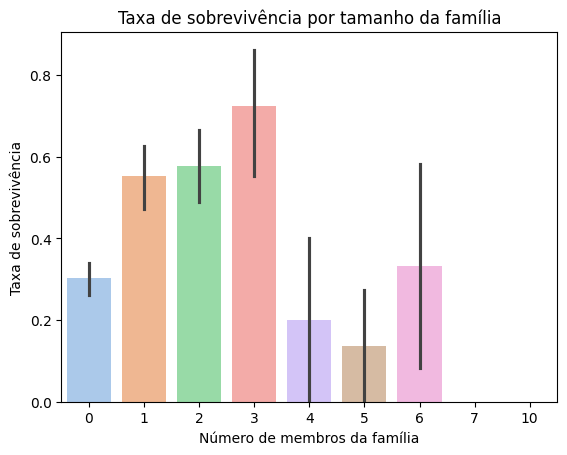

In [114]:
# Criando a feature 'Relatives'
df_full['Relatives'] = df_full['SibSp'] + df_full['Parch']

# Plotar o gráfico de barras da taxa de sobrevivência em relação ao tamanho da família
sns.barplot(x='Relatives', y='Survived', data=df_full, hue='Relatives', palette='pastel', legend=False)
plt.title('Taxa de sobrevivência por tamanho da família')
plt.xlabel('Número de membros da família')
plt.ylabel('Taxa de sobrevivência')
plt.show()

- #### Como podemos ver, dependendo da quantidade de familiares que estão a bordo pode influenciar na sobrevivencia do passageiro
- #### A maior taxa de sobrevivencia é quando o passageiro possui 3 familiares, seguido de 2 e 1. Porém quando o tamanho da familia passa de 4 as taxas caem drasticamente

In [115]:
# Adicionando a feature Relatives no DF novo
df['Relatives'] = df_full['SibSp'] + df_full['Parch']
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Deck,Title,Age,Relatives
0,0.0,3,male,1,0,7.25,S,EFG,Mr,22,1
1,1.0,1,female,1,0,71.28,C,ABCDE,Miss/Mrs/Ms,38,1
2,1.0,3,female,0,0,7.92,S,EFG,Miss/Mrs/Ms,26,0
3,1.0,1,female,1,0,53.10,S,ABCDE,Miss/Mrs/Ms,35,1
4,0.0,3,male,0,0,8.05,S,EFG,Mr,35,0


# Alone
#### Entendendo a coluna Alone
- **Alone**: Numero binario, se o passageiro possui ao menos 1 membro da familia á bordo do Titanic
    - Para passageiros sozinhos é atribuido o valor 1
    - Para casos com um membro ou mais é atribuido o valor 0

In [116]:
# Criando uma função para verificar se os dois valores são vazios (0)
def alone(a, b):
    if a == 0 and b == 0:
        return 1
    else:
        return 0

In [117]:
# Aplicando essa função no DataFrame
df_full['Alone'] = df_full.apply(lambda x: alone(x.SibSp,x.Parch),axis=1)

In [118]:
# Adicionando a feature Alone no DF novo
df['Alone'] = df_full['Alone']
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Deck,Title,Age,Relatives,Alone
0,0.0,3,male,1,0,7.25,S,EFG,Mr,22,1,0
1,1.0,1,female,1,0,71.28,C,ABCDE,Miss/Mrs/Ms,38,1,0
2,1.0,3,female,0,0,7.92,S,EFG,Miss/Mrs/Ms,26,0,1
3,1.0,1,female,1,0,53.10,S,ABCDE,Miss/Mrs/Ms,35,1,0
4,0.0,3,male,0,0,8.05,S,EFG,Mr,35,0,1


# Pre Processing
- Agora faremos todo o pré-processamento, transformação dos dados categoricos e escalonamento

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    float64
 1   Pclass     1309 non-null   int64  
 2   Sex        1309 non-null   object 
 3   SibSp      1309 non-null   int64  
 4   Parch      1309 non-null   int64  
 5   Fare       1309 non-null   float64
 6   Embarked   1309 non-null   object 
 7   Deck       1309 non-null   object 
 8   Title      1309 non-null   object 
 9   Age        1309 non-null   int64  
 10  Relatives  1309 non-null   int64  
 11  Alone      1309 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 122.8+ KB


In [120]:
# Separando a base de dados em X e y para fazermos o pre-processamento
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [121]:
# Visualizando
X

array([[3, 'male', 1, ..., 22, 1, 0],
       [1, 'female', 1, ..., 38, 1, 0],
       [3, 'female', 0, ..., 26, 0, 1],
       ...,
       [3, 'male', 0, ..., 38, 0, 1],
       [3, 'male', 0, ..., 25, 0, 1],
       [3, 'male', 1, ..., 6, 2, 0]], dtype=object)

In [122]:
# [Pclass, Sex, SibSp, Parch, Fare,	Embarked, Deck,	Title, Age,	Relatives, Alone]
X[0]

array([3, 'male', 1, 0, 7.25, 'S', 'EFG', 'Mr', 22, 1, 0], dtype=object)

In [123]:
# Visualizando a classe
y

array([ 0.,  1.,  1., ..., nan, nan, nan])

In [124]:
X.shape

(1309, 11)

In [125]:
y.shape

(1309,)

# Feature Transformation

In [126]:
# One-Hot-Encoder
# [Pclass, Sex, SibSp, Parch, Fare,	Embarked, Deck,	Title, Age,	Relatives, Alone]
onehotencoder = OneHotEncoder()
onehotencorder = ColumnTransformer(transformers=[("OneHotEncoder", onehotencoder, [1, 5])], remainder='passthrough')
# Ajuste e transforme os dados
X = onehotencorder.fit_transform(X)
X.shape


(1309, 14)

In [127]:
# Visualizando
X[0]

array([0.0, 1.0, 0.0, 0.0, 1.0, 3, 1, 0, 7.25, 'EFG', 'Mr', 22, 1, 0],
      dtype=object)

In [128]:
# Ordinal Encoder
ordinal_encoder = OrdinalEncoder()
X[:, [9, 10]] = ordinal_encoder.fit_transform(X[:, [9, 10]])

X[0]

array([0.0, 1.0, 0.0, 0.0, 1.0, 3, 1, 0, 7.25, 2.0, 3.0, 22, 1, 0],
      dtype=object)

# Attribute Scaling

In [129]:
# Fazendo o escalonamento com Padronização
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [130]:
X[0]

array([-0.74349692,  0.74349692, -0.50976981, -0.32204029,  0.65501092,
        0.84191642,  0.48128777, -0.4449995 , -0.50317566,  0.84191642,
        0.74716177, -0.53816802,  0.07335229, -1.23375767])

In [131]:
y[890]

0.0

In [132]:
# Juntando X e y do df completo
arr = np.column_stack((X, y))

In [133]:
arr[890]

array([-0.74349692,  0.74349692, -0.50976981,  3.10520151, -1.52669211,
        0.84191642, -0.47908676, -0.4449995 , -0.49350896,  0.84191642,
        0.74716177,  0.21237741, -0.55834605,  0.81053194,  0.        ])

In [134]:
# Separando as bases de treino e teste usando o índice
index = 891
train = arr[:index]
test = arr[index:]

In [135]:
train[0]

array([-0.74349692,  0.74349692, -0.50976981, -0.32204029,  0.65501092,
        0.84191642,  0.48128777, -0.4449995 , -0.50317566,  0.84191642,
        0.74716177, -0.53816802,  0.07335229, -1.23375767,  0.        ])

In [136]:
train.shape

(891, 15)

In [137]:
test.shape

(418, 15)

In [138]:
test[0]

array([-0.74349692,  0.74349692, -0.50976981,  3.10520151, -1.52669211,
        0.84191642, -0.47908676, -0.4449995 , -0.49196229,  0.84191642,
        0.74716177,  0.36248649, -0.55834605,  0.81053194,         nan])

In [139]:
# Removendo a ultima coluna do array test, pois a nossa base de dados NÃO TEM A CLASSE
test = test[:, :-1]

In [140]:
test[0]

array([-0.74349692,  0.74349692, -0.50976981,  3.10520151, -1.52669211,
        0.84191642, -0.47908676, -0.4449995 , -0.49196229,  0.84191642,
        0.74716177,  0.36248649, -0.55834605,  0.81053194])

# Final Considerations
- Agora os dados estão prontos para serem processados em um modelo
- A variavel test vamos usar somente para enviar a submissão ao Kaggle
- Train será separado por treino e teste com train_test_split
- As variaveis serão salvas para não ser necessário repetir todo esse processamento, usando-as na próxima parte do projeto

In [141]:
# Separar o X e y DO TRAIN
X = train[:, :-1]  # Todas as linhas, todas as colunas exceto a última
y = train[:, -1]   # Todas as linhas, somente a última coluna

In [142]:
# Transformando o target em um inteiro para a submissão do Kaggle
y = y.astype(int)

In [143]:
# Declarando as variaveis que vamos usar para avaliar nossos modelos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [144]:
# Salvando a variavel train e test
with open('Titanic.pkl', mode = 'wb') as f:
  pickle.dump([X_train, X_test, y_train, y_test, test], f)